In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp
import seaborn

In [97]:
%matplotlib inline

In [98]:
import zipfile
zipfile.ZipFile('names.zip').extractall('.')

In [163]:
import os
os.listdir('names')

['NationalReadMe.pdf',
 'yob1880.txt',
 'yob1881.txt',
 'yob1882.txt',
 'yob1883.txt',
 'yob1884.txt',
 'yob1885.txt',
 'yob1886.txt',
 'yob1887.txt',
 'yob1888.txt',
 'yob1889.txt',
 'yob1890.txt',
 'yob1891.txt',
 'yob1892.txt',
 'yob1893.txt',
 'yob1894.txt',
 'yob1895.txt',
 'yob1896.txt',
 'yob1897.txt',
 'yob1898.txt',
 'yob1899.txt',
 'yob1900.txt',
 'yob1901.txt',
 'yob1902.txt',
 'yob1903.txt',
 'yob1904.txt',
 'yob1905.txt',
 'yob1906.txt',
 'yob1907.txt',
 'yob1908.txt',
 'yob1909.txt',
 'yob1910.txt',
 'yob1911.txt',
 'yob1912.txt',
 'yob1913.txt',
 'yob1914.txt',
 'yob1915.txt',
 'yob1916.txt',
 'yob1917.txt',
 'yob1918.txt',
 'yob1919.txt',
 'yob1920.txt',
 'yob1921.txt',
 'yob1922.txt',
 'yob1923.txt',
 'yob1924.txt',
 'yob1925.txt',
 'yob1926.txt',
 'yob1927.txt',
 'yob1928.txt',
 'yob1929.txt',
 'yob1930.txt',
 'yob1931.txt',
 'yob1932.txt',
 'yob1933.txt',
 'yob1934.txt',
 'yob1935.txt',
 'yob1936.txt',
 'yob1937.txt',
 'yob1938.txt',
 'yob1939.txt',
 'yob1940.txt',
 

In [100]:
#open('names/yob1880.txt','r').readlines[:10]

In [101]:
names2011 = pd.read_csv('names/yob2011.txt')

In [102]:
names2011.head()

,Sophia,F,21842
0,Isabella,F,19910
1,Emma,F,18803
2,Olivia,F,17322
3,Ava,F,15503
4,Emily,F,14258


In [103]:
names2011 = pd.read_csv('names/yob2011.txt',names=['Name','Sex','Number_count'])

In [104]:
names2011.head()

,Name,Sex,Number_count
0,Sophia,F,21842
1,Isabella,F,19910
2,Emma,F,18803
3,Olivia,F,17322
4,Ava,F,15503


In [105]:
names_all = []

for year in range(1880,2014+1):
    names_all.append(pd.read_csv('names/yob{}.txt'.format(year),names=['Name','Sex','Number_count']))
    names_all[-1]['year'] = year
        
allyears = pd.concat(names_all)

In [106]:
allyears.head()

,Name,Sex,Number_count,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [107]:
allyears.tail()

,Name,Sex,Number_count,year
33238,Zykeem,M,5,2014
33239,Zymeer,M,5,2014
33240,Zymiere,M,5,2014
33241,Zyran,M,5,2014
33242,Zyrin,M,5,2014


In [108]:
allyears_indexed = allyears.set_index(['Sex','Name','year']).sort_index()

In [109]:
allyears_indexed.head(10)

Number_count
Sex Name      year              
F   Aabha     2011             7
              2012             5
              2014             9
    Aabriella 2008             5
              2014             5
    Aaden     2009             5
    Aadhira   2012             6
              2013            10
              2014            13
    Aadhya    2007            10

In [110]:
allyears_indexed.loc['F','Jane']

,Number_count
year,
1880,215
1881,216
1882,254
1883,247
1884,295
...,...
2010,833
2011,867
2012,927


In [111]:
def plotpop(sex,name):
    data = allyears_indexed.loc[sex,name]
    
    pp.plot(data.index,data.values)


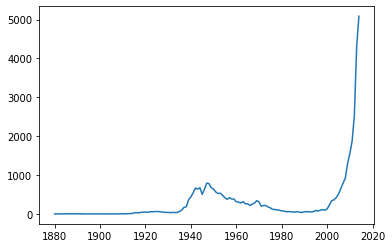

In [112]:
plotpop('F','Penelope')

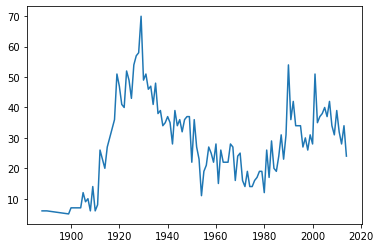

In [113]:
plotpop('M','Johny')

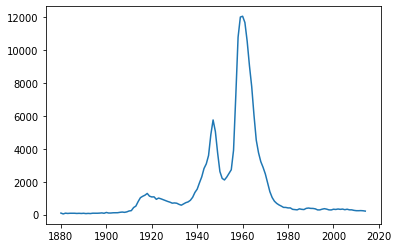

In [114]:
plotpop('M','Mike')

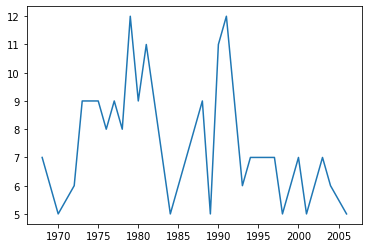

In [115]:
plotpop('F','Jyoti')

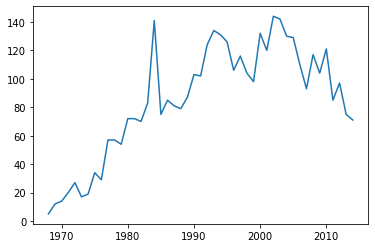

In [116]:
plotpop('F','Anisha')

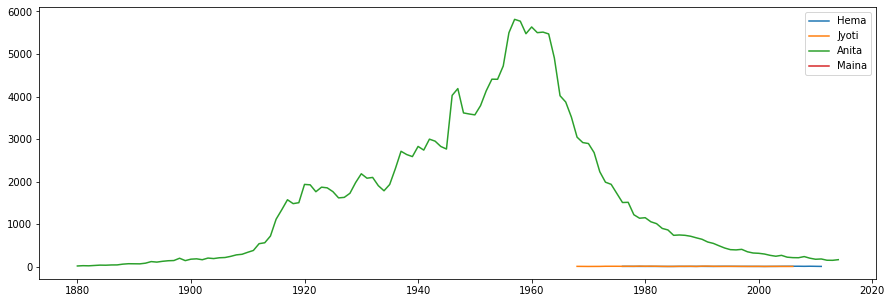

In [117]:
pp.figure(figsize=(15,5))
names = ['Hema','Jyoti','Anita','Maina']

for name in names:
    plotpop('F',name)
    
pp.legend(names)


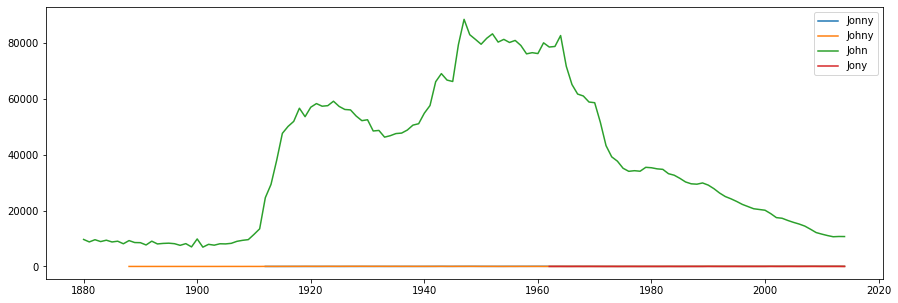

In [118]:
pp.figure(figsize=(15,5))
names = ['Jonny','Johny','John','Jony']

for name in names:
    plotpop('M',name)
    
pp.legend(names)


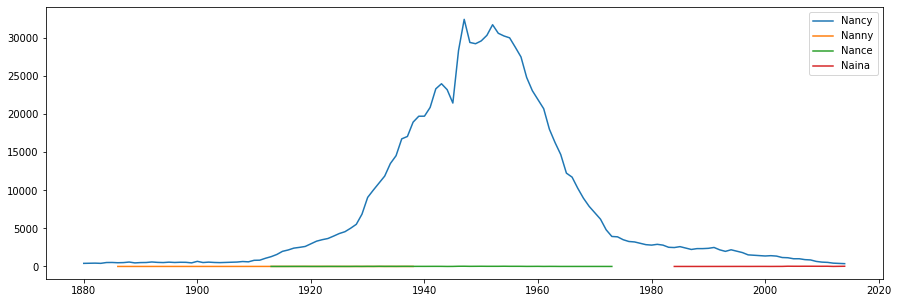

In [119]:
pp.figure(figsize=(15,5))
names = ['Nancy','Nanny','Nance','Naina']

for name in names:
    plotpop('F',name)
    
pp.legend(names)


In [120]:
names = ['Jane','Jessica','Katherine','Nancy']

allyears_indexed.loc['F'].loc[names].head()

Number_count
Name year              
Jane 1880           215
     1881           216
     1882           254
     1883           247
     1884           295

In [121]:
allyears_indexed.loc['F'].loc[names].unstack(level=0).head(20)

Number_count                        
Name         Jane Jessica Katherine Nancy
year                                     
1880          215       7       502   410
1881          216       7       504   429
1882          254       8       591   439
1883          247       6       583   412
1884          295      14       671   520
1885          330       6       751   527
1886          306      11       744   492
1887          288       8       794   511
1888          446      18       893   582
1889          374       9       889   470
1890          372      18       900   512
1891          379      14       803   523
1892          396      14       961   591
1893          354      15       963   538
1894          390      10       948   515
1895          394      19       968   566
1896          413       9      1047   527
1897          396       9       962   553
1898          406      13       914   546
1899          382      14       942   475

In [122]:
allyears_indexed.loc['F'].loc[names].unstack(level=0).fillna(0).head()

Number_count                        
Name         Jane Jessica Katherine Nancy
year                                     
1880          215       7       502   410
1881          216       7       504   429
1882          254       8       591   439
1883          247       6       583   412
1884          295      14       671   520

In [123]:
variants = allyears_indexed.loc['F'].loc[names].unstack(level=0).fillna(0)
variants

Number_count                        
Name         Jane Jessica Katherine Nancy
year                                     
1880          215       7       502   410
1881          216       7       504   429
1882          254       8       591   439
1883          247       6       583   412
1884          295      14       671   520
...           ...     ...       ...   ...
2010          833    3198      3866   573
2011          867    2620      4186   538
2012          927    2332      3951   436
2013          898    1947      3719   409
2014         1026    1797      3678   371

[135 rows x 4 columns]

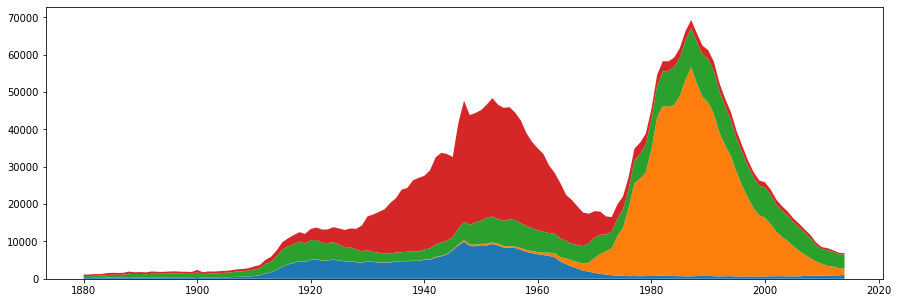

In [124]:
pp.figure(figsize=(15,5))

pp.stackplot(variants.index,variants.values.T,labels=names)


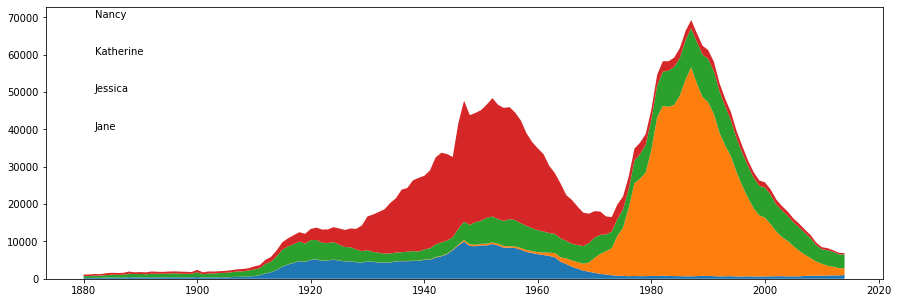

In [125]:
pp.figure(figsize=(15,5))

palette = seaborn.color_palette()
pp.stackplot(variants.index,variants.values.T,colors=palette,labels=names)

for i,name in enumerate(names):
    pp.text(1882,40000+10000*i,name)


In [126]:
topin2008 = allyears_indexed.loc['M',:,2008].sort_values('Number_count',ascending=False).head(10)

In [127]:
topin2008

Number_count
Sex Name        year              
M   Jacob       2008         22594
    Michael     2008         20626
    Ethan       2008         20216
    Joshua      2008         19205
    Daniel      2008         19005
    Alexander   2008         18697
    Anthony     2008         18397
    William     2008         18391
    Christopher 2008         17947
    Matthew     2008         17580

In [128]:
topin2008.reset_index().drop(['Sex','year','Number_count'],axis=1).head(10)

,Name
0,Jacob
1,Michael
2,Ethan
3,Joshua
4,Daniel
5,Alexander
6,Anthony
7,William
8,Christopher
9,Matthew


In [129]:
def top10(sex,year):
    tops = allyears_indexed.loc[sex,:,year].sort_values('Number_count',ascending=False).reset_index().drop(['Sex','year','Number_count'],axis=1).head(10)
    tops.columns = [year]
    
    tops.index = tops.index + 1
    
    return tops


    

In [130]:
top10('M',2008)

,2008
1,Jacob
2,Michael
3,Ethan
4,Joshua
5,Daniel
6,Alexander
7,Anthony
8,William
9,Christopher
10,Matthew


In [131]:
top10('F',2008)

,2008
1,Emma
2,Isabella
3,Emily
4,Olivia
5,Ava
6,Madison
7,Sophia
8,Abigail
9,Elizabeth
10,Chloe


In [132]:
top10('M',2014)

,2014
1,Noah
2,Liam
3,Mason
4,Jacob
5,William
6,Ethan
7,Michael
8,Alexander
9,James
10,Daniel


In [133]:
def top10s(sex,year1,year2):
    tops = [top10(sex,year) for year in range(year1,year2+1)]
    
    return tops[0].join(tops[1:])


In [134]:
top10s('M',2000,2014)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
1,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Jacob,Noah,Noah
2,Michael,Michael,Michael,Michael,Michael,Michael,Michael,Michael,Michael,Ethan,Ethan,Mason,Mason,Jacob,Liam
3,Matthew,Matthew,Joshua,Joshua,Joshua,Joshua,Joshua,Ethan,Ethan,Michael,Michael,William,Ethan,Liam,Mason
4,Joshua,Joshua,Matthew,Matthew,Matthew,Matthew,Ethan,Joshua,Joshua,Alexander,Jayden,Jayden,Noah,Mason,Jacob
5,Christopher,Christopher,Ethan,Andrew,Ethan,Ethan,Matthew,Daniel,Daniel,William,William,Noah,William,William,William
6,Nicholas,Nicholas,Andrew,Joseph,Andrew,Andrew,Daniel,Christopher,Alexander,Joshua,Alexander,Michael,Liam,Ethan,Ethan
7,Andrew,Andrew,Joseph,Ethan,Daniel,Daniel,Andrew,Anthony,Anthony,Daniel,Noah,Ethan,Michael,Michael,Michael
8,Joseph,Joseph,Christopher,Daniel,William,Anthony,Christopher,William,William,Jayden,Daniel,Alexander,Jayden,Alexander,Alexander
9,Daniel,Daniel,Nicholas,Christopher,Joseph,Joseph,Anthony,Matthew,Christopher,Noah,Aiden,Aiden,Alexander,Jayden,James
10,Tyler,William,Daniel,Anthony,Christopher,Christopher,William,Andrew,Matthew,Christopher,Anthony,Daniel,Aiden,Daniel,Daniel


In [135]:
top10s('F',2000,2014)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
1,Emily,Emily,Emily,Emily,Emily,Emily,Emily,Emily,Emma,Isabella,Isabella,Sophia,Sophia,Sophia,Emma
2,Hannah,Madison,Madison,Emma,Emma,Emma,Emma,Isabella,Isabella,Emma,Sophia,Isabella,Emma,Emma,Olivia
3,Madison,Hannah,Hannah,Madison,Madison,Madison,Madison,Emma,Emily,Olivia,Emma,Emma,Isabella,Olivia,Sophia
4,Ashley,Ashley,Emma,Hannah,Olivia,Abigail,Isabella,Ava,Olivia,Sophia,Olivia,Olivia,Olivia,Isabella,Isabella
5,Sarah,Alexis,Alexis,Olivia,Hannah,Olivia,Ava,Madison,Ava,Ava,Ava,Ava,Ava,Ava,Ava
6,Alexis,Sarah,Ashley,Abigail,Abigail,Isabella,Abigail,Sophia,Madison,Emily,Emily,Emily,Emily,Mia,Mia
7,Samantha,Samantha,Abigail,Alexis,Isabella,Hannah,Olivia,Olivia,Sophia,Madison,Abigail,Abigail,Abigail,Emily,Emily
8,Jessica,Abigail,Sarah,Ashley,Ashley,Samantha,Hannah,Abigail,Abigail,Abigail,Madison,Madison,Mia,Abigail,Abigail
9,Elizabeth,Elizabeth,Samantha,Elizabeth,Samantha,Ava,Sophia,Hannah,Elizabeth,Chloe,Chloe,Mia,Madison,Madison,Madison
10,Taylor,Olivia,Olivia,Samantha,Elizabeth,Ashley,Samantha,Elizabeth,Chloe,Mia,Mia,Chloe,Elizabeth,Elizabeth,Charlotte


In [136]:
top10s('F',2000,2014).stack().head()


1  2000    Emily
   2001    Emily
   2002    Emily
   2003    Emily
   2004    Emily
dtype: object

In [137]:
top10s('F',2000,2014).stack().value_counts().head()

Madison    15
Emily      15
Abigail    14
Olivia     14
Emma       13
dtype: int64

In [138]:
popular_name = top10s('F',2000,2014).stack().value_counts().index[:10]
popular_name

Index(['Madison', 'Emily', 'Abigail', 'Olivia', 'Emma', 'Isabella', 'Ava',
       'Sophia', 'Hannah', 'Elizabeth'],
      dtype='object')

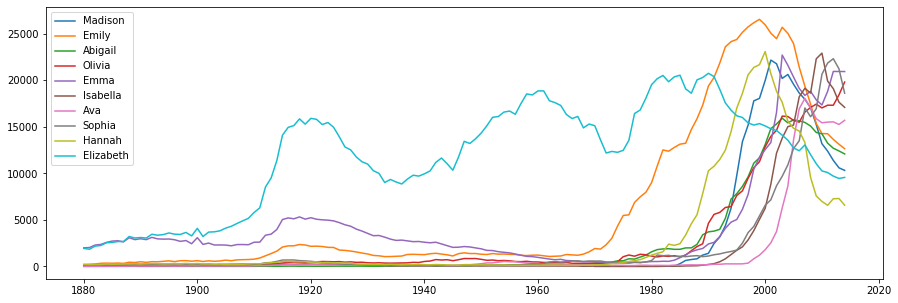

In [139]:
pp.figure(figsize=(15,5))

for name in popular_name:
    plotpop('F',name)
    
pp.legend(popular_name)

In [140]:
def plotpopular10(sex,year1,year2):
    pop_name = top10s(sex,year1,year2).stack().value_counts().index[:6]
    pp.figure(figsize=(15,5))

    for name in pop_name:
        plotpop(sex,name)
    
    pp.legend(pop_name)
    

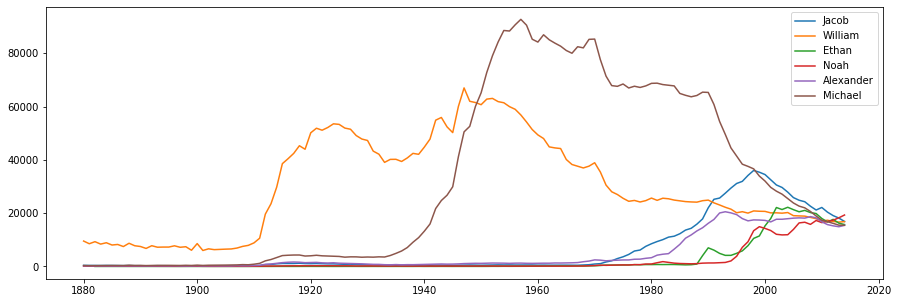

In [141]:
plotpopular10('M',2010,2014)

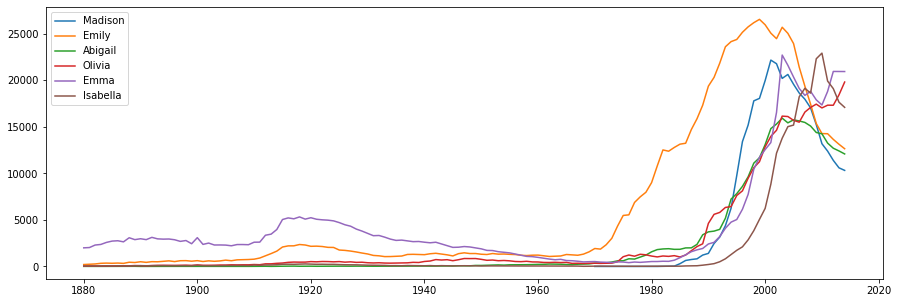

In [142]:
plotpopular10('F',2000,2014)

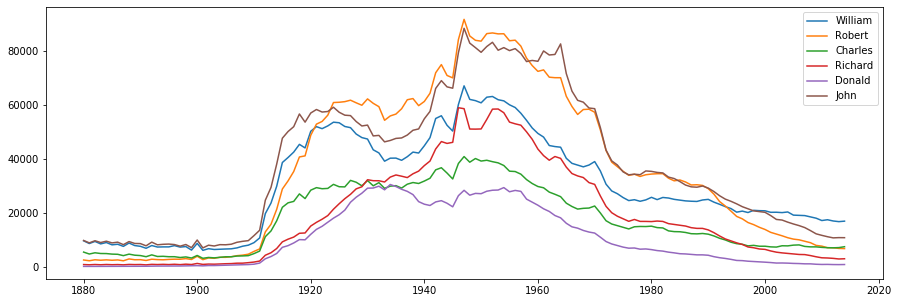

In [143]:
plotpopular10('M',1930,1940)

In [144]:
allyears.groupby(['Sex','Name']).sum().head(10)

Number_count   year
Sex Name                          
F   Aabha                21   6037
    Aabriella            10   4022
    Aaden                 5   2009
    Aadhira              29   6039
    Aadhya              639  16084
    Aadi                 16   6031
    Aadison              11   4021
    Aaditri              26   8049
    Aadrika              10   4027
    Aadvika              13   4027

In [145]:
allyears.groupby(['Sex','Name'])['Number_count'].sum().head(10)

Sex  Name     
F    Aabha         21
     Aabriella     10
     Aaden          5
     Aadhira       29
     Aadhya       639
     Aadi          16
     Aadison       11
     Aaditri       26
     Aadrika       10
     Aadvika       13
Name: Number_count, dtype: int64

In [146]:
totals = allyears.groupby(['Sex','Name'])['Number_count'].sum()
totals.head(10)

Sex  Name     
F    Aabha         21
     Aabriella     10
     Aaden          5
     Aadhira       29
     Aadhya       639
     Aadi          16
     Aadison       11
     Aaditri       26
     Aadrika       10
     Aadvika       13
Name: Number_count, dtype: int64

In [147]:
def sumsq(x):
    return sum(x**2)

In [148]:
spikeness = allyears.groupby(['Sex','Name'])['Number_count'].agg(sumsq) / totals**2

In [149]:
spikeness.head(10)

Sex  Name     
F    Aabha        0.351474
     Aabriella    0.500000
     Aaden        1.000000
     Aadhira      0.362663
     Aadhya       0.262673
     Aadi         0.335938
     Aadison      0.504132
     Aaditri      0.275148
     Aadrika      0.500000
     Aadvika      0.502959
Name: Number_count, dtype: float64

In [150]:
spiky_common = spikeness[totals>5000].copy().sort_values(ascending=False)

In [151]:
spiky_common.head(10)

Sex  Name     
M    Iker         0.199417
     Shaquille    0.195563
     Jase         0.182385
F    Adalynn      0.177214
     Harper       0.164981
M    Brantley     0.160997
F    Arya         0.159952
M    Bentley      0.159389
F    Miley        0.145799
     Paisley      0.145171
Name: Number_count, dtype: float64

In [152]:
spiky_common.tail(10)

Sex  Name   
F    Minerva    0.008852
     Nina       0.008752
     Celia      0.008639
M    Will       0.008633
     Hiram      0.008618
F    Rosa       0.008511
     Mollie     0.008437
M    Ike        0.008310
F    Delia      0.008263
     Louisa     0.007939
Name: Number_count, dtype: float64

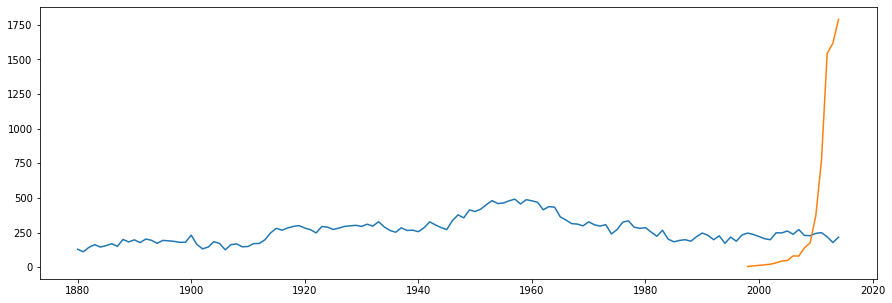

In [153]:
pp.figure(figsize=(15,5))

plotpop('F','Delia')
plotpop('M','Iker')

In [154]:
fads = spiky_common.head(10).index.values

In [155]:
fads

array([('M', 'Iker'), ('M', 'Shaquille'), ('M', 'Jase'), ('F', 'Adalynn'),
       ('F', 'Harper'), ('M', 'Brantley'), ('F', 'Arya'),
       ('M', 'Bentley'), ('F', 'Miley'), ('F', 'Paisley')], dtype=object)

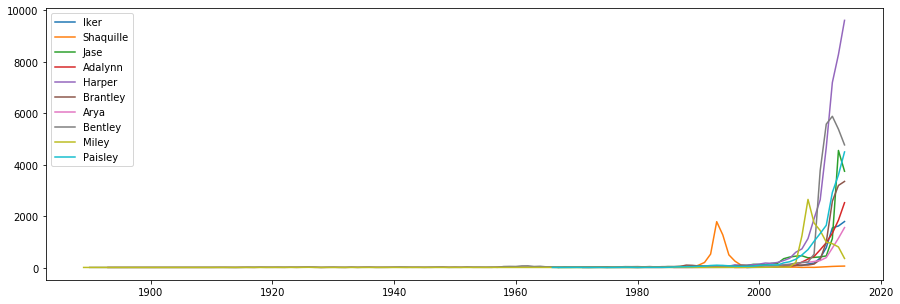

In [156]:
pp.figure(figsize=(15,5))

for sex,name in fads:
    plotpop(sex,name)
    
pp.legend([name for sex,name in fads],loc='upper left' )

In [157]:
total_recent = allyears[allyears['year'] > 2005 ].groupby(['Sex','Name'])['Number_count'].sum()

In [158]:
spiky_common = spikeness[(totals>5000) & (total_recent<1000)].copy().sort_values()

In [159]:
spiky_common.head()

Sex  Name    
M    Ike         0.008310
     Hiram       0.008618
F    Minerva     0.008852
M    Lemuel      0.009003
     Williams    0.009036
Name: Number_count, dtype: float64

In [160]:
fads = spiky_common.head(10).index.values


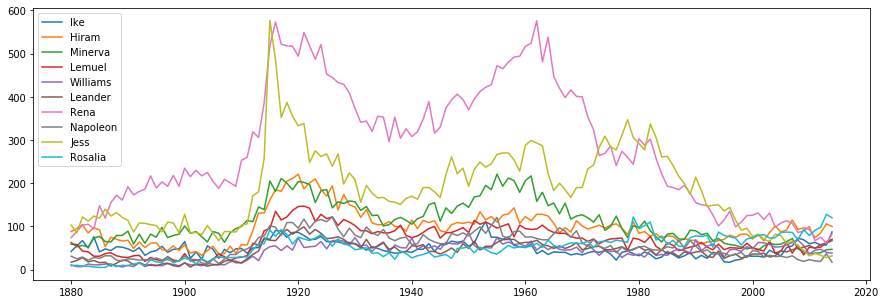

In [161]:
pp.figure(figsize=(15,5))

for sex,name in fads:
    plotpop(sex,name)
    
pp.legend([name for sex,name in fads],loc='upper left')